## 3.1 퍼셉트론에서 신경망으로

### 3.1.3 활성화 함수의 등장 (activation function)
- 신경망에서의 편향(b) 표현: 입력신호가 항상 1이고, 가중치가 b인 뉴런(노드)
- 활성화 함수: 입력 신호의 총합을 출력 신호로 변환하는 함수(activation function)
    - 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할
    - 활성화 함수를 수정하여 다양한 출력 신호로 바꿀 수 있음!!
    - 신경망에서는 활성화 함수를 이용하여 신호를 변환하고, 변환된 신호를 다음 뉴런에 전달
- 함수란, 어떤 값이 입력되면 그에 따른 값을 돌려주는 '변환기' 


## 3.2 활성화 함수
- https://counterattack-tryotto.tistory.com/355<br>
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FNez8m%2FbtqBQoxpE4Z%2FYvKeF07hh7fR3qbkmymKq0%2Fimg.png" width = "700px" height="350px">

- 임계값을 경계로 출력이 바뀌는 활성화 함수: 계단 함수(step function)
    - simple 퍼셉트론에서는 활성화 함수로 계단 함수를 이용
- 활성화 함수를 계단함수에서 다른 함수로 변경하는 것이 신경망의 세계로 나아가는 열쇠

### 3.2.2~3 계단 함수(step funcion, 이진 활성화 함수)
- 계단 함수: 입력이 0을 넘으면 1 출력, 그 외 0 출력
    - 임계값을 경계로 출력값이 바뀌는 형태<br>
    <img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FddIOth%2FbtsiPQeB8g5%2FM70SJsigxeLwkZuUW2p9c0%2Fimg.png" width = "300px" height="100px"><br>
    - 딥러닝 모델에서는 사용되지 않은 함수 - 불연속점(Point of Discontinuity)을 가지기 때문
    - 역전파(Back Propagation)에서 모델의 파라미터(parameter)들이 극단적으로 변경되기에 적합하지 않음

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    # y = x > 0   # bool
    # np배열.astype(원하는자료형): 넘파이 배열의 자료형 변환
    # y = y.astype(int) # bool->int (False : 0, True: 1)
    
    return np.array(x>0, dtype=int)

step_function(np.array([-0.2, 0.3]))


array([0, 1])

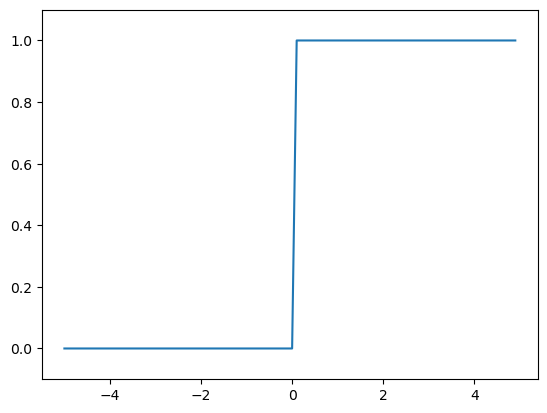

In [2]:
# 계단함수 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)  # y축 표시 범위 지정
plt.show()


### 3.2.4~6 시그모이드 함수, 비선형 함수

- 시그모이드함수 역할: 무한대의 실수값을 0~1 사이 확률값으로 변환<br>
    <img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuwU0n%2FbtsiPQMsLQt%2Fzy61yk6A0rIBOXWc88Jpw1%2Fimg.png" width = "300px" height="100px"><br>
    - 기울기 폭주(Exploding Gradient) 현상 방지
    - 기울기 소실(Vanishing Gradient) 발생 가능
    - non-linear 하다
    - 보통 출력층에서만 사용
- 계단함수와의 특징 비교
    1. 차이점: 입력에 따라 출력이 연속적으로 변화(매끈함) -> 퍼셉트론에서는 0,1만 흘렀다면 신경망에서는 연속적인 실수가 흐름
    2. 공통점: 
        - 범위가 0<=y<=1 (입력이 작을수록 0, 클수록 1에 가까움) -> 입력이 중요할 수록 큰 값을 출력
        - 비선형 함수
- 비선형함수란?
    - 선형함수 f(x)=ax+b: 입력의 상수배만큼 변환 , 1개의 직선
    - 비선형함수: 직선 1개로 그릴 수 없는 함수
- 활성화함수로 선형함수를 쓰면 안되는 이유
    - 신경망에서는 활성화 함수로 '비선형 함수'를 사용해야 함
    - 선형함수 쓰면 안되는 이유: 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있기 때문에, 층을 쌓는 의미가 없어짐.
        - h(x)=cx 활성화 함수로 이용한 3층 네트워크의 출력 : y(x) = h(h(h(x))) = c*c*c*x 
        - -> 이는 한 개의 층에 y(x) = c^3x 를 사용하는 것과 똑같음. 고로 층 쌓는 의미가 없다. 그래서 다른 특징을 갖는(비선형 이란 성질을 갖는) 함수를 이용해서 층을 쌓아야 다양한 데이터를 학습할 수 있음.
        - https://kevinitcoding.tistory.com/entry/%ED%99%9C%EC%84%B1%ED%99%94-%ED%95%A8%EC%88%98-%EC%A0%95%EC%9D%98%EC%99%80-%EC%A2%85%EB%A5%98-%EB%B9%84%EC%84%A0%ED%98%95-%ED%95%A8%EC%88%98%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%B4%EC%95%BC-%ED%95%98%EB%8A%94-%EC%9D%B4%EC%9C%A0
    

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

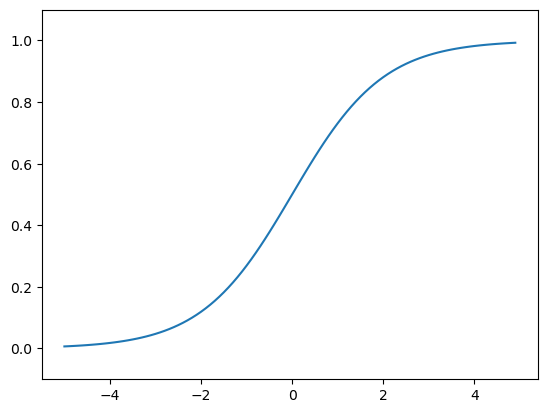

In [15]:
# 시그모이드 그래프 (= s자 모양)
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### 3.2.7 Relu함수(Rectified Linear Unit, 렐루)
- Relu함수: x가 0 이하이면 0을 출력(차단)<br>
    <img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbu04Fc%2FbtsiRFcynwb%2FQcKyBAkPTVM0r0V4ZDID11%2Fimg.png" width = "300px" height="100px">
    - 전기회로 용어에서 '정류'란 어떤 흐름을 차단하는 것인데, -를 차단한다고 생각하자.
    - 간단한 미분 연산을 통해 가중치 업데이트를 수행할 수 있다.

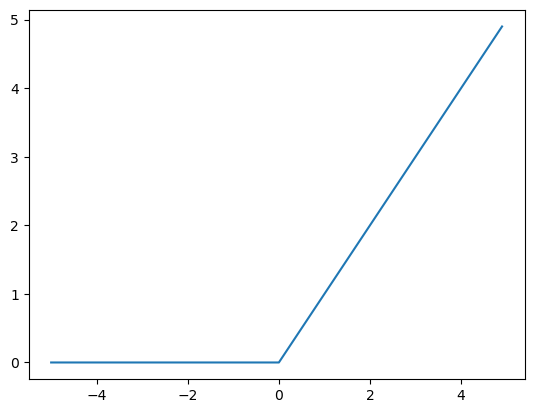

In [11]:
def relu(x):
    return np.maximum(x,0)
x = np.arange(-5.0,5.0,0.1)
y = relu(x)
plt.plot(x,y)
plt.show()


### 그 외 함수들
- Leaky Relu
    - c라는 음수인 상수를 도입해 음의 기울기로 역전파를 수행하도록 할 수 있다.
- Hyperbolic Tangent Function
    - -1부터 1까지의 값을 가지는 함수이다.
    - 기울기 소실(Vanishing Gradient) 발생 가능
- Softmax Function
    - n차원의 벡터에서 특정 출력 값이 k번째에 속할 확률을 계산한다. 
    - 출력층에서 사용하게 된다.
    - 주로 분류 모델에 쓰인다.
    - Softmin, Log softmax 함수도 있다.


## 3.3 다차원 배열의 계산

In [6]:
# 차원 확인
A = np.array([[1,2],[2,3],[3,4]])
print(np.ndim(A))  # 배열의 차원
print(A.shape)     # 배열의 형상 확인

2
(3, 2)


In [7]:
# 행렬(2차원배열) 내적
X = np.array([1,2])
W = np.array([[5,6,7],[8,9,10]])
np.dot(X,W)

array([21, 24, 27])

## 3.4 3층 신경망 구현하기
- 출력층의 활성화 함수: 문제의 성질에 맞게 정함(회귀?분류?)
    - 회귀: 항등함수 (입력을 그대로 출력, identity function)
    - 이진 클래스 분류: 시그모이드 함수
    - 다중 클래스 분류: 소프트맥스 함수

In [18]:
def init_network():
    network={}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2,0.4,0.6]])
    network['B1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['B2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['B3'] = np.array([0.1,0.2])

    return network

## 순전파: 신호가 입력층->출력층 순방향으로 전달됨
def forward(network, x):
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['B1'], network['B2'], network['B3']

    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = a3 # 출력층 활성화 함수: 항등함수!! 입력을 그대로 출력

    return y

network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기
- 출력층의 활성화 함수: 문제의 성질에 맞게 정함(회귀?분류?)
    - 회귀(예측): 항등 함수 (입력을 그대로 출력, identity function)
    - 이진 클래스 분류: 시그모이드 함수
    - 다중 클래스 분류: 소프트맥스 함수

### 3.5.1 소프트맥스 함수
- 주로 다중 클래스 분류문제의 출력층에 쓰임
    - 특정 출력 값이 k번째에 속할 '확률'을 계산한다. 
    - 출력은 0~1사이 실수, 출력의 총합은 1⭐️ (-> 이 성질 때문에 소맥 함수 출력을 확률로 해석 가능 한 것)
    - y = 한 신호의 exp값/전체 신호의 exp값의 합


- softmax 함수의 문제
    1. 오버플로우 -> 해결 가능: 컴퓨터에서는 지수함수의 큰 값으로 인해 오버플로우(컴퓨터는 수를 4~8바이트로 크기가 유한한 데이터로 다룸. 그래서 범위가 넘어가는 값은 표현 불가능) 발생 가능.. 그러면 연산이 불안정해짐. 그래서 변형된 소프트맥수 함수 사용! p.93<br>
    <img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F8ma7G%2FbtsiQ7nVasz%2FQdiPzpOyC9QOQW8thUAuw1%2Fimg.png" width = "360px" height="100px">
        - 일반적으로 C는 입력신호 중 max 값 사용 (-C)
        - C를 어떤 정수로 하든 결과는 바뀌지 않음!!!!!
    2. 소맥 함수를 적용해도 각 원소의 대소 관계는 안변함(지수함수는 단조 증가 함수이므로)
        - So, *추론 단계에서 출력층의 소맥 함수는 생략해도 됨.* (현업에서도 지수함수 계산에 자원 낭비를 줄이고자 생략하는게 일반적)
        - (학습단계에서는 출력층에 소맥 사용해야!!)


In [36]:
def softmax(a):
    c = np.max(a)
    # exp_a = np.exp(a)
    exp_a = np.exp(a - c)   # 오버플로우 대책!!
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y
print(softmax(np.array([1010,1000,990])))   # a-c 안하면 nan뜸
print(softmax(np.array([0.3,2.9,4.0])))     # 해당 입력은 약 74% 확률로 3번째 클래스다.

[9.99954600e-01 4.53978686e-05 2.06106005e-09]
[0.01821127 0.24519181 0.73659691]


### 3.5.4 출력층의 뉴런 수 정하기
- 출력층의 뉴런수
    - 분류: 분류하고 싶은 클래스 수 (0~9 숫자 분류: 출력층 노드 10개)
    

## 3.6 MNIST 숫자 인식

In [86]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist

# 추론test할 데이터 불러오기
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

# 학습된 신경망 불러오기
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network
    '''
    뉴런 개수
    # input: 784(28x28)
    # hidden1: 50  
    # hidden2: 100
    # output: 10(0~9)
    '''

# 추론
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    # y = a3

    return y


In [87]:
## 정확도 구현
x, t = get_data()   # 손글씨데이터, 정답레이블
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # 정확도(올바르게 분류한 비율)
print(t[-1])
print(y)    # 6번째 원소가 젤 확률 높음

Accuracy:0.9352
6
[4.2882829e-04 2.0043019e-06 2.5405674e-03 2.0168900e-06 5.5917702e-04
 3.1262016e-04 9.9614763e-01 4.3499372e-07 6.3756870e-06 3.7751377e-07]


### 3.6.3 배치 처리
- 배치: 하나로 묶은 입력 데이터 (묶음)
- 배치 처리 이점
    - **추론에서는**: 큰 배치를 사용하여 병렬 처리 하드웨어의 성능을 최대한 활용하는 것이 일반적으로 더 빠르고 효율적임 (컴퓨터에서는 작은 배열 여러번보다 큰 배열을 한꺼번에 계산 하는 것이 더 빠르고 효율적임) p.103
    - **학습에서는**: 큰 배치가 GPU,CPU의 연산 성능을 높일 수 있지만, 메모리 초과문제, 학습의 일반화 성능 저해 우려가 있음.

In [88]:
x, t = get_data()   # 손글씨데이터, 정답레이블
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(t.shape)
print(W1.shape, W2.shape, W3.shape)


(10000, 784)
(784,)
(10000,)
(784, 50) (50, 100) (100, 10)


In [89]:
## 정확도 구현
x, t = get_data()   # 손글씨데이터, 정답레이블
network = init_network()
accuracy_cnt = 0

batch_size = 100
for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size] # (100, 784)
    y_batch = predict(network, x_batch) # (100, 10)
    p= np.argmax(y_batch, axis=1) # (100,1) -> 데이터 별로 모든열 중 max 원소 idx 반환
    accuracy_cnt += np.sum(p==t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # 정확도(올바르게 분류한 비율)

Accuracy:0.9352


In [95]:
arr = np.array([[1,2,0],[2,3,4],[4,3,2],[0,0,2]])
print(arr)
a = np.argmax(arr, axis=0)  # 행 기준(all 행 중 큰거): 각 열에서 all 행들 중 가장 큰 원소의 인덱스
b = np.argmax(arr, axis=1)  # 열 기준(all 열 중 큰거): 각 행에서 all 열들 중 가장 큰 원소의 인덱스
print(a)
print(b)

[[1 2 0]
 [2 3 4]
 [4 3 2]
 [0 0 2]]
[2 1 1]
[1 2 0 2]
